

##K-MEANS CLUSTERING



The objective is to cluster different football clubs based on various atributes.


(a) Your initial step should be extracting the club information from the player dataset. It will involve computing the “average player” of each club. One way is to group the dataset by “club name id” and calculate the mean values for all relevant features. You are encouraged to explore different ideas.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('football.csv')

* Group by Club: Group the dataset by the "club_team_id" to create groups for each club

In [3]:
club_groups = df.groupby('club_team_id')

* Calculate the Average Player for Each Club: Calculate the mean values for all relevant features within each club group.

In [4]:
average_players = club_groups.mean()


<ipython-input-4-0b8fa8a3448a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_players = club_groups.mean()


##calculating the mean values for all relevant features

*  Calculating the average "overall" rating for each club

In [5]:

average_overall_ratings = club_groups['overall'].mean()

# Sort the clubs by average rating in descending order
average_overall_ratings = average_overall_ratings.sort_values(ascending=False)

# Display the top clubs with the highest average rating
print(average_overall_ratings.head())



club_team_id
73.0     87.181818
9.0      86.727273
10.0     86.090909
243.0    85.545455
21.0     85.363636
Name: overall, dtype: float64


*  Calculate the average "height_cm"  for each club

In [6]:

average_height = club_groups['height_cm'].mean()

# Sort the clubs by average height in descending order
average_height = average_height.sort_values(ascending=False)


print(average_height.head())

club_team_id
492.0       188.090909
1443.0      187.818182
113743.0    187.363636
1961.0      187.272727
110329.0    187.090909
Name: height_cm, dtype: float64


*  Calculating the average "age"  for each club

In [7]:
average_age = club_groups['age'].mean()

# Sort the clubs by average age in descending order
average_age = average_age.sort_values(ascending=False)


print(average_age.head())

club_team_id
100831.0    32.090909
110955.0    31.363636
111400.0    31.090909
110969.0    31.090909
110974.0    30.909091
Name: age, dtype: float64


*  Calculating the average "weight" for each club

In [8]:
average_weight = club_groups['weight_kg'].mean()

# Sort the clubs by average age in descending order
average_weight = average_weight.sort_values(ascending=False)


print(average_weight.head())

club_team_id
492.0       83.454545
21.0        82.636364
110502.0    82.454545
22.0        81.909091
113743.0    81.636364
Name: weight_kg, dtype: float64




---



---
## (B)

Now, use K-Means to cluster the football clubs. You can determine the criteria for clustering by considering various features. first try to using all features, after that try again using only features representing player stats or financial attributes.

**(C)**
To find the optimal number of clusters, K, you can use the elbow method.




* Clustering using K Means:

using all features :--

In [9]:
selected_features_all = df.drop(columns=['club_team_id','player_traits','player_tags','body_type','goalkeeping_speed','short_name','club_name','league_name','work_rate','preferred_foot'])
y = df['club_team_id']

In [10]:
selected_features_all.fillna(selected_features_all.mean(),inplace=True)

In [11]:
from sklearn.cluster import KMeans

WCSS - It is defined as the sum of square distances between the centroids and
each points.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

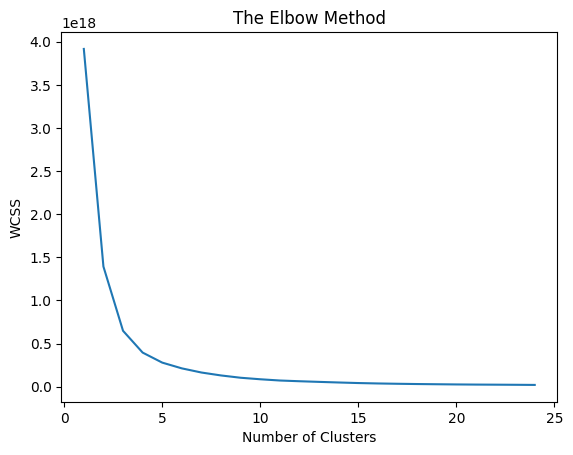

In [14]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,25):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(selected_features_all)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,25),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## using only financial atributes

In [15]:
selected_features = df[['value_eur']]
y = df['club_team_id']

In [16]:
selected_features.fillna(selected_features.mean(),inplace=True)

<ipython-input-16-1ab36287baef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features.fillna(selected_features.mean(),inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

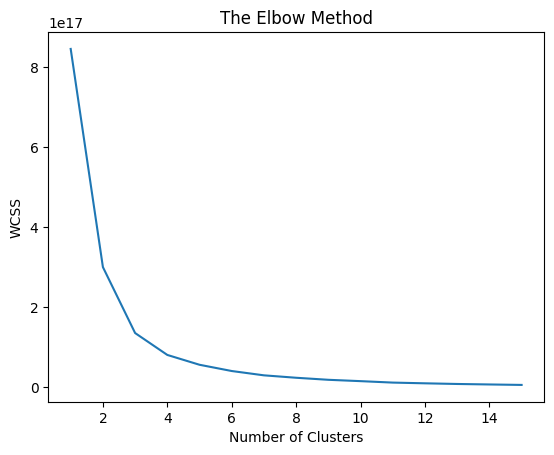

In [18]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,16):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(selected_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,16),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

 **using elbow method : optimal value of K (no of clusters) is 5**

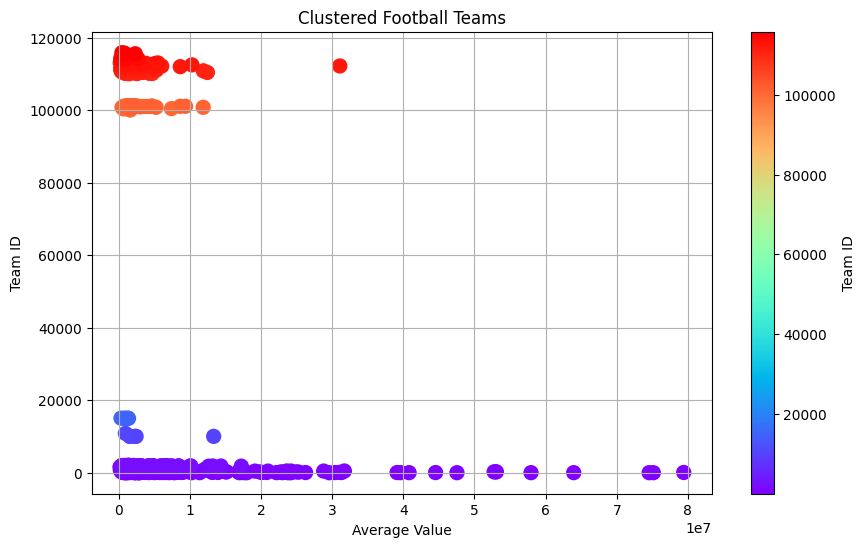

In [19]:
import pandas as pd

# Load the dataset
data = pd.read_csv('football.csv')

# Select the relevant columns
selected_data = df[['club_team_id', 'value_eur']]
team_data = selected_data.groupby('club_team_id')['value_eur'].mean().reset_index()

team_ids = team_data['club_team_id']
average_values = team_data['value_eur']

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(average_values, team_ids, c=team_ids, cmap='rainbow', marker='o', s=100)
plt.xlabel('Average Value')
plt.ylabel('Team ID')
plt.title('Clustered Football Teams')
plt.colorbar(label='Team ID')
plt.grid()
plt.show()
